## Appendix A, ML Engineering in Action
##### Author: Ben Wilson

In this notebook, we're following along with Appendix A, "Big O(no) and how to think about runtime performance". <br>
We'll be going through examples of different computational and space complexities, measuring their runtime complexities and estimated space requirements. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter, FixedLocator
import math
import numpy as np
import pandas as pd
from collections import namedtuple
import warnings

The following is just how I generated the graphics for figures A.4 and A.5. Just in case anyone was curious.

In [2]:
SERIES_SIZE = 150

In [3]:
def generate_complexity_series(series_size):
    SeriesData = namedtuple('SeriesData', 'x factorial power squared n nlogn logn one')
    series_x = np.arange(1, series_size, 1)
    return SeriesData(
        series_x,
        [math.factorial(x) for x in series_x],
        [math.pow(2, x) for x in series_x],
        [math.pow(x, 2) for x in series_x],
        series_x,
        [math.log(x) * x for x in series_x],
        [math.log(x) for x in series_x],
        [1 for x in series_x]
    )

def plot_series(ax, x, y, name, linestyle, color, bbox, xy, fs):
    ax.plot(x, y, label=name, linestyle=linestyle, color=color)
    ax.annotate(name, xy=xy, color=color, bbox=bbox, fontsize=fs)
    
def generate_complexity_plot(**kwargs):
    series_size = kwargs.get('series_size', 150)
    fs = kwargs.get('font_size', 14)
    bbox_conf = dict(boxstyle='round,pad=0.5', fc='ivory', ec='grey', lw=0.8)
    data = generate_complexity_series(series_size)
    with plt.style.context(style='seaborn'):
        fig = plt.figure(figsize=kwargs.get('plot_size', (10, 10)))
        ax = fig.add_subplot(111)
        plot_series(ax, data.x, data.factorial, 'O(n!)', '--', 'blue', bbox_conf, [series_size*0.01, series_size*0.9], fs)
        plot_series(ax, data.x, data.power, 'O($2^n$)', '-.', 'green', bbox_conf, [series_size*0.025, series_size*0.8], fs)
        plot_series(ax, data.x, data.squared, 'O($n^2$)', '-', 'black', bbox_conf, [series_size*0.06, series_size*0.7], fs)
        plot_series(ax, data.x, data.nlogn, 'O(n log(n))', ':', 'brown', bbox_conf, [20, series_size/1.75], fs)
        plot_series(ax, data.x, data.n, 'O(n)', '--', 'red', bbox_conf, [series_size/2, series_size/2], fs)
        plot_series(ax, data.x, data.logn, 'O(log(n))', '-.', 'orangered', bbox_conf, [series_size*0.7, series_size*0.02], fs)
        plot_series(ax, data.x, data.one, 'O(1)', '-', 'steelblue', bbox_conf, [series_size*0.9, 1], fs)
        ax.legend(loc='best', fontsize=fs)
        ax.set_title('Computational Complexity comparison')
        ax.set_ylabel('Total number of operations')
        ax.set_xlabel('Number of elements to iterate through')
        ax.set_ylim([0,series_size])
        for i in [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels():
            i.set_fontsize(fs)
        plt.savefig(kwargs.get('image_name', 'linear_computational_complexity.svg'), format='svg')

def plot_series_l(ax, x, y, name, linestyle, color, bbox, xy, fs):
    ax.semilogy(x, y, label=name, linestyle=linestyle, color=color)
    ax.annotate(name, xy=xy, color=color, bbox=bbox, fontsize=fs)        

def generate_complexity_logscale(**kwargs):
    series_size = kwargs.get('series_size', 150)
    fs = kwargs.get('font_size', 14)
    bbox_conf = dict(boxstyle='round,pad=0.5', fc='ivory', ec='grey', lw=0.8)
    data = generate_complexity_series(series_size)
    with plt.style.context(style='seaborn'):
        fig = plt.figure(figsize=kwargs.get('plot_size', (10, 10)))
        ax = fig.add_subplot(111)
        plot_series_l(ax, data.x, data.factorial, 'O(n!)', '--', 'blue', bbox_conf, [series_size*0.05, series_size*1e5], fs)
        plot_series_l(ax, data.x, data.power, 'O($2^n$)', '-.', 'green', bbox_conf, [series_size*0.12, series_size*1e4], fs)
        plot_series_l(ax, data.x, data.squared, 'O($n^2$)', '-', 'black', bbox_conf, [series_size*0.07, series_size*0.7], fs)
        plot_series_l(ax, data.x, data.nlogn, 'O(n log(n))', ':', 'brown', bbox_conf, [25, series_size/1.75], fs)
        plot_series_l(ax, data.x, data.n, 'O(n)', '--', 'red', bbox_conf, [series_size/2, series_size/2], fs)
        plot_series_l(ax, data.x, data.logn, 'O(log(n))', '-.', 'orangered', bbox_conf, [series_size*0.7, series_size*0.02], fs)
        plot_series_l(ax, data.x, data.one, 'O(1)', '-', 'steelblue', bbox_conf, [series_size*0.85, 1], fs)
        ax.legend(loc='best', fontsize=fs)
        ax.set_title('Computational Complexity comparison')
        ax.set_ylabel('Total number of operations')
        ax.set_xlabel('Number of elements to iterate through')
        ax.set_ylim([1,1e12])
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)**2))
        ax.set_yscale('log')
        for i in [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels():
            i.set_fontsize(fs)
        plt.savefig(kwargs.get('image_name', 'log_computational_complexity.svg'), format='svg')

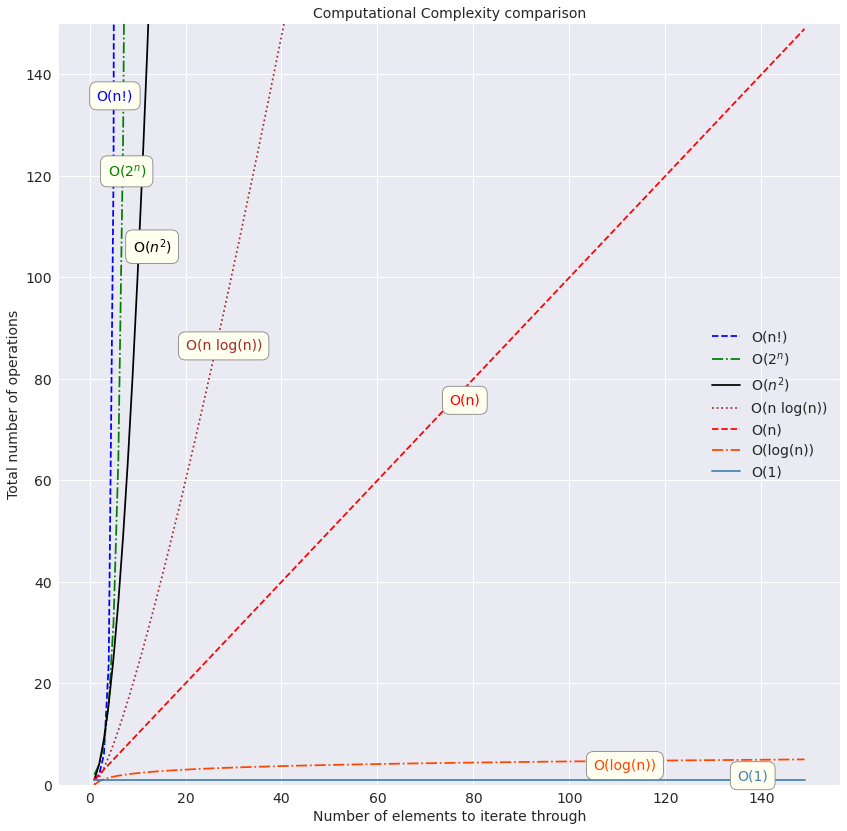

In [4]:
generate_complexity_plot(**dict(series_size=SERIES_SIZE, plot_size=(14, 14), font_size=14))

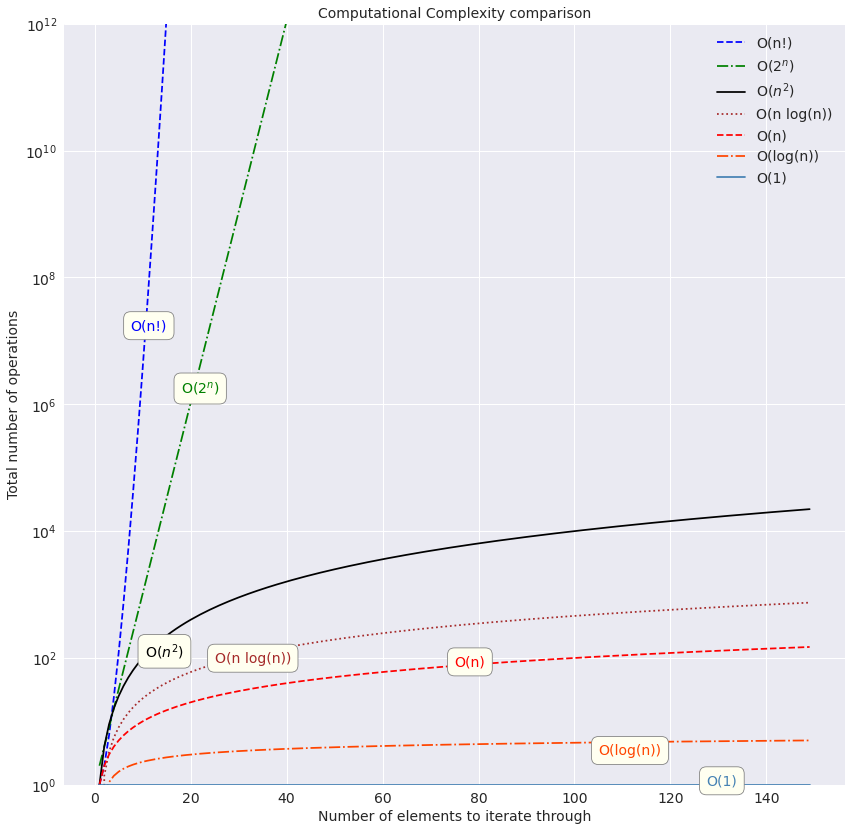

In [5]:
generate_complexity_logscale(**dict(series_size=SERIES_SIZE, plot_size=(14, 14), font_size=14))

#### Listing A.3 Demonstration of 0(1) complexity
In this listing, we're going to be generating an array of integers and validating that access to indexed positions within the array stays constant regardless of the size of the collection. 

In [6]:
sequential_array = np.arange(-100, 100, 1)

Accessing values from a collection based on index position

In [7]:
last_value = sequential_array[-1]
last_value

99

In [8]:
%timeit -n 10000 -r 100 sequential_array[-1]

264 ns ± 52.5 ns per loop (mean ± std. dev. of 100 runs, 10000 loops each)


And now, let's generate a collection that is 4 orders of magnitude larger.

In [9]:
massive_array = np.arange(-1e7, 1e7, 1)

In [10]:
%timeit -n 10000 -r 100 massive_array[-1]

262 ns ± 27.2 ns per loop (mean ± std. dev. of 100 runs, 10000 loops each)


Operations such as mathematical calculations themselves have a computational complexity to them. <br>
Here, below, we're defining a basic quadratic equation that will incur staged calculations to satisfy the resulting answer.

In [11]:
def quadratic(x):
    return 0.00733 * math.pow(x, 3) -0.001166 * math.pow(x, 2) + 0.32 * x - 1.7334

In [12]:
%timeit -n 10000 -r 100 quadratic(sequential_array[-1])

5.27 µs ± 266 ns per loop (mean ± std. dev. of 100 runs, 10000 loops each)


However, since we're interested in the impact of collection size to the computational complexity, we can see what the effect on runtime is for running this quadratic equation against the last entry of the 'truly massive array'. It is comparable to the calculation on the last index value of the smaller array.

In [13]:
%timeit -n 10000 -r 100 quadratic(massive_array[-1])

1.59 µs ± 215 ns per loop (mean ± std. dev. of 100 runs, 10000 loops each)


#### Listing A.4 Demonstration of O(n) complexity
In this listing, we're looking at a linear relationship between operations being performed against each element in the collection. As the size of the collection increases, the execution time increases in a roughly linear relationship.

This complexity is most often seen in traversals of collections.

In [14]:
quad_y = [quadratic(x) for x in sequential_array]

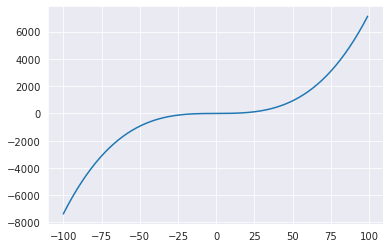

In [15]:
sns.set_style('darkgrid')
sns.lineplot(sequential_array, quad_y)

In [21]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-10, 10, 1)]

178 µs ± 26.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [16]:
%timeit -n 10 -r 10 [quadratic(x) for x in sequential_array]

1.34 ms ± 325 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [22]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-200, 200, 1)]

3.16 ms ± 808 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [23]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-500, 500, 1)]

5.64 ms ± 459 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [17]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-1000, 1000, 1)]

11.7 ms ± 734 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [18]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-10000, 10000, 1)]

114 ms ± 5.11 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [19]:
%timeit -n 10 -r 10 [quadratic(x) for x in np.arange(-100000, 100000, 1)]

1.16 s ± 36.6 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [20]:
%timeit -n 2 -r 3 [quadratic(x) for x in massive_array]

33 s ± 499 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)


Now let's take a look at those results (if you run this, the timing may be slightly different than the values displayed below due to hardware and environment differences).

In [76]:
o_n_size = [20, 200, 400, 1000, 2000, 20000, 200000]
o_n_time = [0.178, 1.34, 3.16, 5.64, 11.7, 114, 1160]

def plot_timing_n(collection_size, timing, algo):
    fig = plt.figure(figsize=(7,5))
    ax = sns.lineplot(collection_size, timing)
    plt.title('Runtime comparison of {} algorithm'.format(algo))
    sns.scatterplot(collection_size, timing, s=60, color='black')
    ax.set(xlabel='Array Size', ylabel='Execution time (milliseconds)')
    plt.savefig('{}_computational_relationship.svg'.format(algo), format='svg')

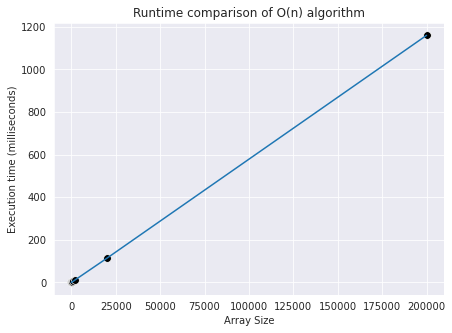

In [77]:
plot_timing_n(o_n_size, o_n_time, "O(n)")

The code included in the next two cells (for calculating the memory footprint of objects in Python) is directly attributable to: <br>
https://stackoverflow.com/questions/449560/how-do-i-determine-the-size-of-an-object-in-python <br>
Based on the answer provided by Aaron Hall
https://stackoverflow.com/users/541136/aaron-hall <br>
It's definitely the most comprehensive way I've found to recursively inspect the object tree in Python. Also, Aaron's a fantastic StackOverflow moderator and developer.

In [38]:
import sys
from types import ModuleType, FunctionType
from gc import get_referents

In [39]:
INVALID_TYPES = type, ModuleType, FunctionType

def get_memory_footprint(x, footprint=0, id_collection=None):
    id_collection = id_collection if id_collection else set()
    object_tree = [x]
    while object_tree:
        children = []
        for node in object_tree:
            if not isinstance(node, INVALID_TYPES) and id(node) not in id_collection:
                id_collection.add(id(node))
                footprint += sys.getsizeof(node)
                children.append(node)
        object_tree = get_referents(*children)
    return footprint

In [45]:
get_memory_footprint([quadratic(x) for x in np.arange(-10, 10, 1)])

896

In [46]:
get_memory_footprint([quadratic(x) for x in np.arange(-100, 100, 1)])

8064

In [47]:
get_memory_footprint([quadratic(x) for x in np.arange(-1000, 1000, 1)])

80552

In [48]:
get_memory_footprint([quadratic(x) for x in np.arange(-10000, 10000, 1)])

818016

In [49]:
get_memory_footprint([quadratic(x) for x in np.arange(-100000, 100000, 1)])

8071784

In [78]:
o_n_mem_size = [20, 200, 2000, 20000, 200000]
o_n_mem_value = [896, 8064, 80552, 818016, 8071784]

def plot_size_n(collection_size, mem_size, algo):
    fig = plt.figure(figsize=(7,5))
    ax = sns.lineplot(collection_size, mem_size)
    plt.title('Space Complexity comparison of ${}$ algorithm'.format(algo))
    sns.scatterplot(collection_size, mem_size, s=60, color='black')
    ax.set(xlabel='Array Size', ylabel='Memory pressure (Bytes)')
    plt.savefig('{}_space_relationship.svg'.format(algo), format='svg')

We can see the linear relationship for space complexity for this O(n) algorithm mirror the computational complexity. As the size of the array increases in size, the memory requirements for storing the results increase in a linear fashion.

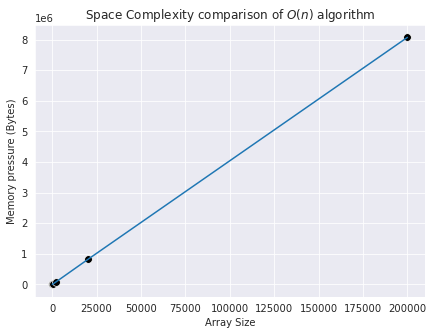

In [79]:
plot_size_n(o_n_mem_size, o_n_mem_value, "O(n)")

#### Listing A.5 An example of O(n^2) complexity
Here we're going to look at a rather nasty complexity that, when used as a brute-force technique to solve a problem can lead to significant runtime and scalability problems.

In [62]:
def quadratic_div(x, y):
    return quadratic(x) / y

def n_squared_sim(size):
    max_value = np.ceil(size / 2)
    min_value = max_value * -1
    x_values = np.arange(min_value, max_value + 1, 1)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        curve_matrix = [[quadratic_div(x, y) for x in x_values] for y in x_values]
    curve_df = pd.DataFrame(curve_matrix).T
    curve_df.insert(loc=0, column='X', value=x_values)
    curve_melt = curve_df.melt('X', var_name='iteration', value_name='Y')
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    sns.lineplot(x='X', y='Y', hue='iteration', data=curve_melt, ax=ax)
    plt.ylim(-100,100)
    for i in [ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels():
        i.set_fontsize(14)
    plt.tight_layout
    plt.savefig('n_squared_{}.svg'.format(size), format='svg')
    plt.close()
    return curve_melt

The function above will iterate over the array for each element in the source size argument. This is O(n^2) in complexity.

#### Listing A.6 Results of evaluating an O(n^2) complex algorithm
Here we're going to be timing and showing both the computational and space complexity of the n^2 relationship of this algorithm. 

In [63]:
%timeit -n 2 -r 2 ten_iterations = n_squared_sim(10)

358 ms ± 1.73 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [64]:
get_memory_footprint(n_squared_sim(10))

26315

In [65]:
%timeit -n 2 -r 2 one_hundred_iterations = n_squared_sim(100)

2.92 s ± 22.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [75]:
get_memory_footprint(n_squared_sim(100))

1477199

In [67]:
%timeit -n 2 -r 2 two_hundred_iterations = n_squared_sim(200)

8.69 s ± 10.1 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [68]:
get_memory_footprint(n_squared_sim(200))

5825199

In [69]:
%timeit -n 2 -r 2 five_hundred_iterations = n_squared_sim(500)

49.8 s ± 116 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [70]:
get_memory_footprint(n_squared_sim(500))

36149199

In [71]:
%timeit -n 2 -r 2 one_thousand_iterations = n_squared_sim(1000)

3min 52s ± 1.47 s per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [72]:
get_memory_footprint(n_squared_sim(1000))

144289199

In [73]:
%timeit -n 1 -r 1 two_thousand_iterations = n_squared_sim(2000)

24min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
get_memory_footprint(n_squared_sim(2000))

576569199

The following cell is the visualization used for figure 11.4 (hard-coded annotations)

In [ ]:
x_data = [10, 100, 200, 500, 1000, 2000]
y_data = [0.433, 3.08, 8.58, 49.8, (3 * 60) + 56, (22 * 60) + 47]
plt.figure(figsize=(7,5))
ax = sns.lineplot(x_data, y_data )
plt.title('Runtime comparison of $O(n^2)$ algorithm')
sns.scatterplot(x_data, y_data)
ax.text(x_data[0]-150, y_data[0]+50, "[{}, {}]".format(x_data[0], y_data[0]))
ax.text(x_data[1]-50, y_data[1]-60, "[{}, {}]".format(x_data[1], y_data[1]))
ax.text(x_data[2]-5, y_data[2]+80, "[{}, {}]".format(x_data[2], y_data[2]))
ax.text(x_data[3]+50, y_data[3]-35, "[{}, {}]".format(x_data[3], y_data[3]))
ax.text(x_data[4]+60, y_data[4]+10, "[{}, {}]".format(x_data[4], y_data[4]))
ax.text(x_data[5]-400, y_data[5]-5, "[{}, {}]".format(x_data[5], y_data[5]))
ax.set(xlabel='Array Size', ylabel='Execution time (seconds)')
plt.savefig('n_squared_relationship.svg', format='svg')

In [80]:
n2_array_sizes = [10, 100, 200, 500, 1000, 2000]
n2_time_complexity = [0.358, 2.92, 8.69, 49.8, (3 * 60) + 52, (24 * 60) + 19]
n2_space_complexity = [26315, 1477199, 5825199, 36149199, 144289199, 576569199]

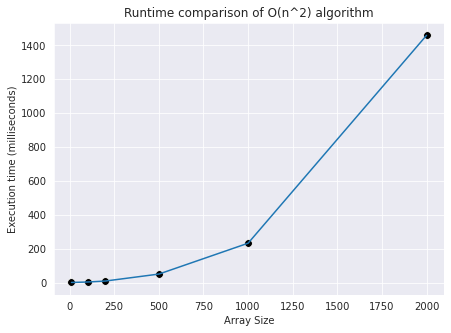

In [81]:
plot_timing_n(n2_array_sizes, n2_time_complexity, 'O(n^2)')

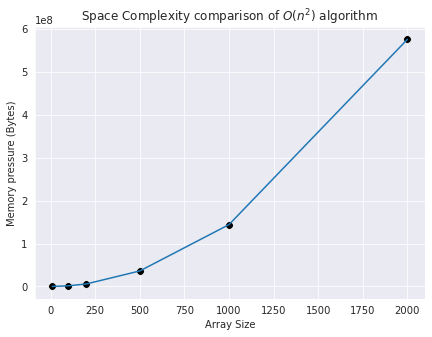

In [82]:
plot_size_n(n2_array_sizes, n2_space_complexity, 'O(n^2)')

#### Listing A.7 Demonstrating the effects of tree depth on runtime performance
This section is to show the effects that hyperparameters have on influencing the runtime behavior of models. Due to the very nature of these algorithms, most iterate through optimizations, controlled by these settings to (generally) increase performance at the expense of runtime. <br>
For this test, we're going to be using the Forest Fire data set from Portgual (a standard open source regression data set) and showing the effect on runtime by setting different tree maximum depths.

In [93]:
import requests
import calendar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

URL = 'https://raw.githubusercontent.com/databrickslabs/automl-toolkit/master/src/test/resources/fire_data.csv'
file_reader = pd.read_csv(URL)

month_map = dict((v.lower(), k) for k, v in enumerate(calendar.month_abbr))
day_map = dict((v.lower(), k) for k, v in enumerate(calendar.day_abbr))

file_reader['month'] = file_reader['month'].map(month_map)
file_reader['day'] = file_reader['day'].map(day_map)

target = file_reader['burnArea']
features = file_reader.drop('burnArea', axis=1)

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=42)

In [94]:
shallow_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, max_features='auto', random_state=42)
%timeit -n 500 -r 5 shallow_tree.fit(train_features, train_target)
shallow_fit = shallow_tree.fit(train_features, train_target)
test_prediction_shallow = shallow_fit.predict(test_features)
rmse_shallow = np.sqrt(mean_squared_error(test_target, test_prediction_shallow))
rmse_shallow

2.99 ms ± 77.2 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


98.30470595971725

In [95]:
mid_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, max_features='auto', random_state=42)
%timeit -n 500 -r 5 mid_tree.fit(train_features, train_target)
mid_fit = mid_tree.fit(train_features, train_target)
test_prediction_mid = mid_fit.predict(test_features)
rmse_mid = np.sqrt(mean_squared_error(test_target, test_prediction_mid))
rmse_mid

3.46 ms ± 234 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


91.65876529139206

In [96]:
deep_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, max_features='auto', random_state=42)
%timeit -n 500 -r 5 deep_tree.fit(train_features, train_target)
deep_fit = deep_tree.fit(train_features, train_target)
test_prediction_deep = deep_fit.predict(test_features)
rmse_deep = np.sqrt(mean_squared_error(test_target, test_prediction_deep))
rmse_deep

4.15 ms ± 158 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


91.63093510582752

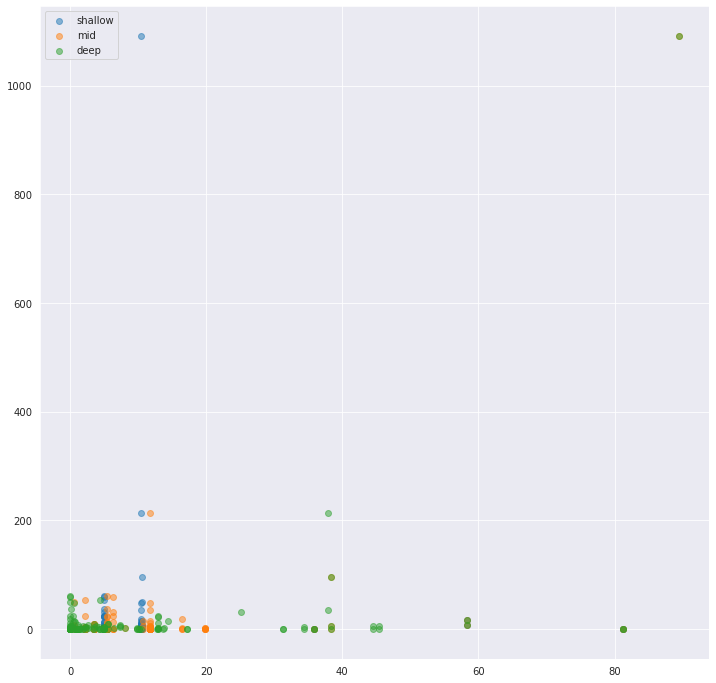

In [97]:
plt.figure(figsize=(12,12))
plt.scatter(test_prediction_shallow, test_target, alpha=0.5, label="shallow")
plt.scatter(test_prediction_mid, test_target, alpha=0.5, label='mid')
plt.scatter(test_prediction_deep, test_target, alpha=0.5, label='deep')
plt.legend(loc='best')

Here we're going to push the depth of the tree by one-hot-encoding the categorical fields in the feature vector. 

In [98]:
URL = 'https://raw.githubusercontent.com/databrickslabs/automl-toolkit/master/src/test/resources/fire_data.csv'
file_reader = pd.read_csv(URL)

encoded = pd.get_dummies(file_reader, columns=['month', 'day'])
target_encoded = encoded['burnArea']
features_encoded = encoded.drop('burnArea', axis=1)

x_encoded, X_encoded, y_encoded, Y_encoded = train_test_split(features_encoded, target_encoded, test_size=0.25, random_state=42)

In [99]:
shallow_encoded = DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, max_features='auto', random_state=42)
%timeit -n 500 -r 5 shallow_encoded.fit(x_encoded, y_encoded)
shallow_encoded_fit = shallow_encoded.fit(x_encoded, y_encoded)
test_prediction_shallow_encoded = shallow_encoded.predict(X_encoded)
rmse_shallow_encoded = np.sqrt(mean_squared_error(Y_encoded, test_prediction_shallow_encoded))
rmse_shallow_encoded

3.27 ms ± 79.5 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


98.51370742374829

In [100]:
mid_encoded = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, max_features='auto', random_state=42)
%timeit -n 500 -r 5 mid_encoded.fit(x_encoded, y_encoded)
mid_encoded_fit = mid_encoded.fit(x_encoded, y_encoded)
test_prediction_mid_encoded = mid_encoded.predict(X_encoded)
rmse_mid_encoded = np.sqrt(mean_squared_error(Y_encoded, test_prediction_mid_encoded))
rmse_mid_encoded

3.54 ms ± 109 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


98.94529411483828

In [101]:
deep_encoded = DecisionTreeRegressor(max_depth=30, min_samples_leaf=1, max_features='auto', random_state=42)
%timeit -n 500 -r 5 deep_encoded.fit(x_encoded, y_encoded)
deep_encoded_fit = deep_encoded.fit(x_encoded, y_encoded)
test_prediction_deep_encoded = deep_encoded.predict(X_encoded)
rmse_deep_encoded = np.sqrt(mean_squared_error(Y_encoded, test_prediction_deep_encoded))
rmse_deep_encoded

5.71 ms ± 366 µs per loop (mean ± std. dev. of 5 runs, 500 loops each)


105.12478629357221

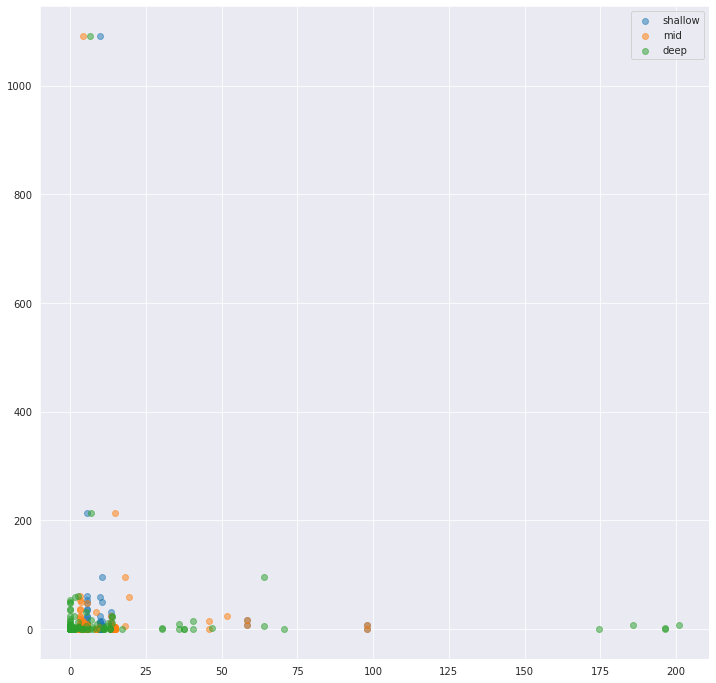

In [102]:
plt.figure(figsize=(12,12))
plt.scatter(test_prediction_shallow_encoded, Y_encoded, alpha=0.5, label="shallow")
plt.scatter(test_prediction_mid_encoded, Y_encoded, alpha=0.5, label='mid')
plt.scatter(test_prediction_deep_encoded, Y_encoded, alpha=0.5, label='deep')
plt.legend(loc='best')

Let's see how deep that one-hot-encoded tree got with the maximum depth set to 30.<br>
There results of outliers on the validation data show a pretty poorly overfit model.

In [104]:
deep_encoded_fit.get_depth()

18

For fun, here is the visualization for figure 11.15

In [106]:
# visualization for SGD

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x_values = np.arange(-20,20,0.01)
y_values = x_values
x_grid, y_grid = np.meshgrid(x_values, y_values)
z_form = np.sqrt(x_grid**2 + y_grid**2)
z_grid = -np.sin(z_form) / z_form


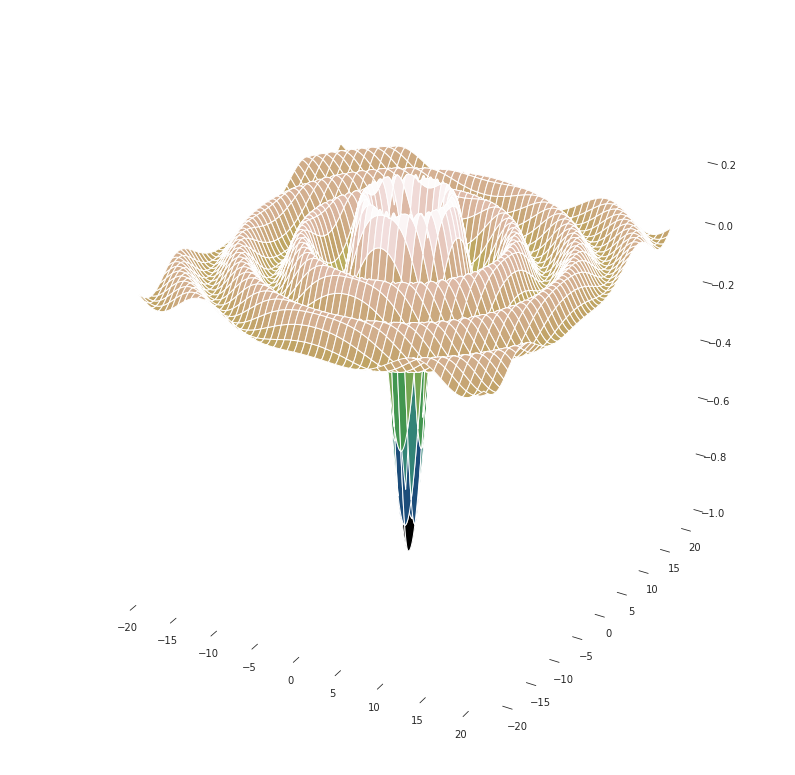

In [107]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('w')
ax.plot_surface(x_grid, y_grid, z_grid, cmap=cm.gist_earth)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
plt.savefig("sgd_reference_example.svg", format='svg')